In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import shap
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['yr_sold'] = df['date'].dt.year
df['house_age'] = df['yr_sold'] - df['yr_built']
df['effective_age'] = np.where(
    df['yr_renovated'] == 0,
    df['yr_sold'] - df['yr_built'],
    df['yr_sold'] - df['yr_renovated']
)
df = df.drop(['id', 'date', 'zipcode', 'yr_built', 'yr_renovated','yr_sold','house_age'], axis=1)

In [3]:
X = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
models = {'Linear Regression': LinearRegression(),
          'Lasso':Lasso(),
          'Ridge':Ridge(),
          'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
          'XGBoost': XGBRegressor(n_estimators=100, random_state=42)}
results = {}
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = {'R-squared': r2, 'MAE': mae, 'RMSE': rmse}
results_df = pd.DataFrame(results)
results_df

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.154e+13, tolerance: 2.259e+11
  model = cd_fast.enet_coordinate_descent(


,Linear Regression,Lasso,Ridge,Random Forest,XGBoost
R-squared,0.689475,0.689475,0.689474,0.855375,0.861144
MAE,130302.760793,130227.857243,130226.452182,72538.140561,71288.574135
RMSE,216665.831172,216665.955236,216666.440358,147864.475468,144885.667386


In [4]:
X = df.drop('price', axis=1)
y = np.log1p(df['price'])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)
models = {'Linear Regression': LinearRegression(),
          'Lasso':Lasso(),
          'Ridge':Ridge(),
          'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
          'XGBoost': XGBRegressor(n_estimators=100, random_state=42)}
results = {}
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_log_pred = model.predict(X_test_scaled)
    y_test_actual = np.expm1(y_test)
    y_pred_actual = np.expm1(y_log_pred)
    r2 = r2_score(y_test_actual, y_pred_actual)
    mae = mean_absolute_error(y_test_actual, y_pred_actual)
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
    results[name] = {'R-squared': r2, 'MAE': mae, 'RMSE': rmse}
results_df = pd.DataFrame(results)
results_df

,Linear Regression,Lasso,Ridge,Random Forest,XGBoost
R-squared,0.441449,-0.049510,0.442875,0.881314,0.875146
MAE,120287.475397,229794.667592,120306.569452,71819.033162,69555.818326
RMSE,290585.492443,398323.237959,290214.166945,133949.727669,137386.494337


In [5]:
X = df.drop('price', axis=1)
y = np.log1p(df['price'])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {'Linear Regression': LinearRegression(),
          'Lasso':Lasso(),
          'Ridge':Ridge(),
          'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
          'XGBoost': XGBRegressor(n_estimators=100, random_state=42)}
results = {}
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_log_pred = model.predict(X_test_scaled)
    y_test_actual = np.expm1(y_test)
    y_pred_actual = np.expm1(y_log_pred)
    r2 = r2_score(y_test_actual, y_pred_actual)
    mae = mean_absolute_error(y_test_actual, y_pred_actual)
    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
    results[name] = {'R-squared': r2, 'MAE': mae, 'RMSE': rmse}
results_df = pd.DataFrame(results)
results_df

,Linear Regression,Lasso,Ridge,Random Forest,XGBoost
R-squared,0.441449,-0.049510,0.442875,0.881314,0.875146
MAE,120287.475397,229794.667592,120306.569452,71819.033162,69555.818326
RMSE,290585.492443,398323.237959,290214.166945,133949.727669,137386.494337


In [6]:
X = df.drop('price', axis=1)
y = np.log1p(df['price'])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.4],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0.1, 0.5, 1.0, 5.0]
}
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,
    scoring='neg_root_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred_log = best_model.predict(x_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)


print("R²:", r2_score(y_true, y_pred))
print("MAE:", mean_absolute_error(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, reg_alpha=1, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, reg_alpha=1, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, reg_alpha=1, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, reg_alpha=1, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=300, reg_alpha=1, reg_lambda=0.1, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=6, n_estimators=200, reg_alpha=0.01, reg_lambda=5.0, subsample=0.6; total time=   0.4s
[CV] E

In [7]:
final_model = XGBRegressor(objective='reg:squarederror', random_state=42, **random_search.best_params_)
final_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

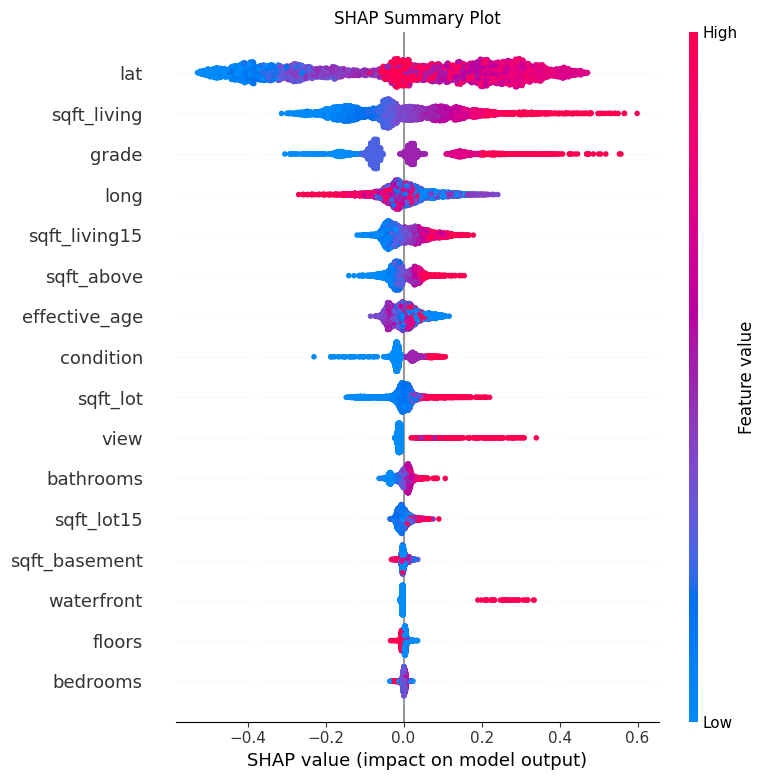

In [8]:
explainer = shap.TreeExplainer(final_model)

shap_values = explainer.shap_values(x_test)

plt.title("SHAP Summary Plot")
shap.summary_plot(shap_values, x_test,feature_names=x_test.columns)
plt.show()

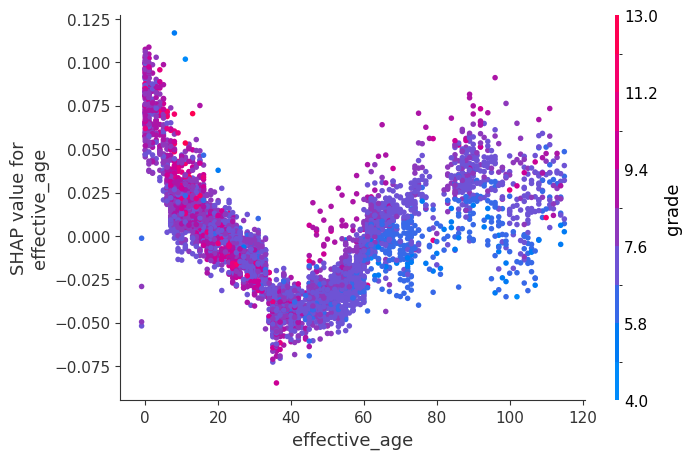

In [9]:
shap.dependence_plot("effective_age", shap_values, x_test, interaction_index="grade")

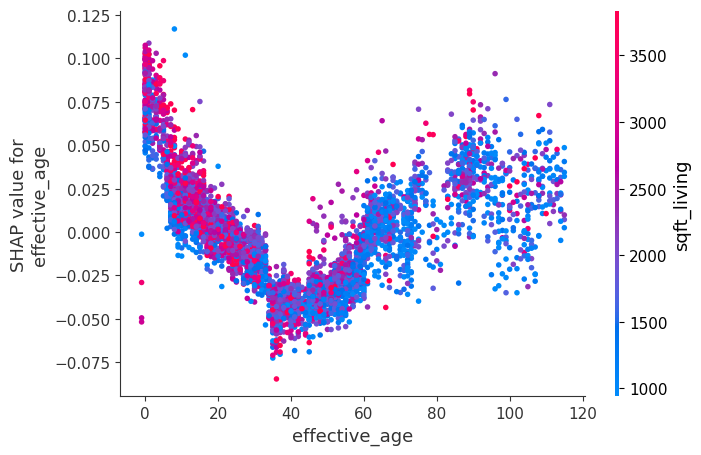

In [10]:
shap.dependence_plot("effective_age", shap_values, x_test, interaction_index="sqft_living")